# Google Mobility Report

In [56]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
pd.set_option('display.max_columns', 500)

## Load data

### Google Mobility data

In [57]:
gmobility = pd.concat(map(pd.read_csv, glob.glob('data/mobility_google_2020_2021/Google_*.csv'))) 
gmobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268788 entries, 0 to 135405
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 268788 non-null  object 
 1   country_region                                      268788 non-null  object 
 2   sub_region_1                                        268143 non-null  object 
 3   sub_region_2                                        171763 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     136536 non-null  object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            268788 non-null  object 
 8   date                                                268788 non-n

### Restrictions timeline

In [58]:
restrict = pd.read_csv('data/restrictions.csv')
restrict.head()

,Restriction,start_date,end_date,Color
0,Work from home advised,17/03/2020,21/03/2020,0.5
1,"Schools, pubs closed",21/03/2020,24/03/2020,0.6
2,1st Lockdown,24/03/2020,10/05/2020,1.0
3,Some workers encouraged to return to work,10/05/2020,01/06/2020,0.7
4,"Schools open, small groups outside",01/06/2020,15/06/2020,0.5


In [59]:
restrict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Restriction  19 non-null     object 
 1   start_date   19 non-null     object 
 2   end_date     19 non-null     object 
 3   Color        19 non-null     float64
dtypes: float64(1), object(3)
memory usage: 736.0+ bytes


In [60]:
restrict['start_date'] = pd.to_datetime(restrict['start_date'], format="%d/%m/%Y")
restrict['end_date'] = pd.to_datetime(restrict['end_date'], format="%d/%m/%Y")
restrict['interval'] = dates.date2num(restrict['end_date']) - dates.date2num(restrict['start_date'])
restrict['interval'] = restrict.interval.astype(int)

## Data Processing

### Drop, filter, rename

In [61]:
# drop unnecessary columns
gmobility.drop(gmobility.columns[[0,1,2,4,5,6,7]],axis=1,inplace=True)

In [62]:
# rename columns for easy readability
gmobility = gmobility.rename(
        columns={'sub_region_2':'Borough',
                 'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation', 
                 'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_and_pharmacy',
                 'parks_percent_change_from_baseline': 'parks', 
                 'transit_stations_percent_change_from_baseline': 'transit_stations', 
                 'workplaces_percent_change_from_baseline': 'workplaces',
                 'residential_percent_change_from_baseline': 'residential', 
                 })

In [63]:
gmobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268788 entries, 0 to 135405
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Borough                171763 non-null  object 
 1   date                   268788 non-null  object 
 2   retail_and_recreation  260196 non-null  float64
 3   grocery_and_pharmacy   260682 non-null  float64
 4   parks                  209443 non-null  float64
 5   transit_stations       259115 non-null  float64
 6   workplaces             267089 non-null  float64
 7   residential            251307 non-null  float64
dtypes: float64(6), object(2)
memory usage: 18.5+ MB


In [64]:
gmobility.Borough.unique()

array([nan, 'Aylesbury Vale', 'Chiltern District', 'South Bucks District',
       'Wycombe District', 'Cambridge', 'East Cambridgeshire District',
       'Fenland District', 'Huntingdonshire District',
       'South Cambridgeshire District', 'Penryn', 'Allerdale District',
       'Barrow-in-Furness District', 'City of Carlisle',
       'Copeland District', 'Eden District', 'South Lakeland District',
       'Amber Valley', 'Bolsover District', 'Chesterfield District',
       'Derbyshire Dales District', 'Erewash District',
       'High Peak District', 'North East Derbyshire District',
       'South Derbyshire District', 'East Devon District', 'Exeter',
       'Mid Devon District', 'North Devon District',
       'South Hams District', 'Teignbridge', 'Torridge District',
       'West Devon District', 'Bournemouth, Christchurch and Poole',
       'Dorset', 'Eastbourne', 'Hastings District', 'Lewes District',
       'Rother District', 'Wealden District', 'Basildon District',
       'Borough

In [65]:
boroughs = ['City of London', 'City of Westminster',
       'London Borough of Barking and Dagenham',
       'London Borough of Barnet', 'London Borough of Bexley',
       'London Borough of Brent', 'London Borough of Bromley',
       'London Borough of Camden', 'London Borough of Croydon',
       'London Borough of Ealing', 'London Borough of Enfield',
       'London Borough of Hackney',
       'London Borough of Hammersmith and Fulham',
       'London Borough of Haringey', 'London Borough of Harrow',
       'London Borough of Havering', 'London Borough of Hillingdon',
       'London Borough of Hounslow', 'London Borough of Islington',
       'London Borough of Lambeth', 'London Borough of Lewisham',
       'London Borough of Merton', 'London Borough of Newham',
       'London Borough of Redbridge',
       'London Borough of Richmond upon Thames',
       'London Borough of Southwark', 'London Borough of Sutton',
       'London Borough of Tower Hamlets',
       'London Borough of Waltham Forest', 'London Borough of Wandsworth',
       'Royal Borough of Greenwich',
       'Royal Borough of Kensington and Chelsea',
       'Royal Borough of Kingston upon Thames']

In [66]:
len(boroughs)

33

In [67]:
# only extract data for Greater London area
gmobility = gmobility.loc[gmobility['Borough'].isin(boroughs)]
gmobility = gmobility.reset_index(drop=True)

In [68]:
gmobility['Borough'].unique()

array(['City of London', 'City of Westminster',
       'London Borough of Barking and Dagenham',
       'London Borough of Barnet', 'London Borough of Bexley',
       'London Borough of Brent', 'London Borough of Bromley',
       'London Borough of Camden', 'London Borough of Croydon',
       'London Borough of Ealing', 'London Borough of Enfield',
       'London Borough of Hackney',
       'London Borough of Hammersmith and Fulham',
       'London Borough of Haringey', 'London Borough of Harrow',
       'London Borough of Havering', 'London Borough of Hillingdon',
       'London Borough of Hounslow', 'London Borough of Islington',
       'London Borough of Lambeth', 'London Borough of Lewisham',
       'London Borough of Merton', 'London Borough of Newham',
       'London Borough of Redbridge',
       'London Borough of Richmond upon Thames',
       'London Borough of Southwark', 'London Borough of Sutton',
       'London Borough of Tower Hamlets',
       'London Borough of Waltham Fo

In [69]:

# drop "London Borough of " and "Royal Borough of " before borough (sub_region_2) names
gmobility['Borough'] = gmobility['Borough'].str.replace('London Borough of ', '')
gmobility['Borough'] = gmobility['Borough'].str.replace('Royal Borough of ', '')
gmobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21285 entries, 0 to 21284
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Borough                21285 non-null  object 
 1   date                   21285 non-null  object 
 2   retail_and_recreation  21267 non-null  float64
 3   grocery_and_pharmacy   21273 non-null  float64
 4   parks                  20244 non-null  float64
 5   transit_stations       21285 non-null  float64
 6   workplaces             21050 non-null  float64
 7   residential            20534 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.3+ MB


### Interpolate

In [70]:
gmobility.isna().sum()

Borough                     0
date                        0
retail_and_recreation      18
grocery_and_pharmacy       12
parks                    1041
transit_stations            0
workplaces                235
residential               751
dtype: int64

In [71]:
for borough in gmobility['Borough'].unique():
    display(borough, gmobility[gmobility['Borough']==borough].isna().sum())

'City of London'

Borough                    0
date                       0
retail_and_recreation      0
grocery_and_pharmacy       6
parks                      6
transit_stations           0
workplaces               205
residential              645
dtype: int64

'City of Westminster'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                     0
transit_stations          0
workplaces                3
residential              12
dtype: int64

'Barking and Dagenham'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Barnet'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Bexley'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Brent'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Bromley'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    20
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Camden'

Borough                  0
date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    7
transit_stations         0
workplaces               3
residential              5
dtype: int64

'Croydon'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Ealing'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Enfield'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Hackney'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Hammersmith and Fulham'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                3
residential              10
dtype: int64

'Haringey'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Harrow'

Borough                   0
date                      0
retail_and_recreation     1
grocery_and_pharmacy      0
parks                    28
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Havering'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Hillingdon'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Hounslow'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Islington'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                3
residential               3
dtype: int64

'Lambeth'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    15
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Lewisham'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Merton'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Newham'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    26
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Redbridge'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Richmond upon Thames'

Borough                   0
date                      0
retail_and_recreation     1
grocery_and_pharmacy      3
parks                    19
transit_stations          0
workplaces                6
residential              18
dtype: int64

'Southwark'

Borough                  0
date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    0
transit_stations         0
workplaces               0
residential              0
dtype: int64

'Sutton'

Borough                   0
date                      0
retail_and_recreation    16
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                3
residential               0
dtype: int64

'Tower Hamlets'

Borough                  0
date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    0
transit_stations         0
workplaces               0
residential              0
dtype: int64

'Waltham Forest'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    25
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Wandsworth'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    11
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Greenwich'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      0
parks                    20
transit_stations          0
workplaces                0
residential               0
dtype: int64

'Kensington and Chelsea'

Borough                   0
date                      0
retail_and_recreation     0
grocery_and_pharmacy      3
parks                    25
transit_stations          0
workplaces                6
residential              51
dtype: int64

'Kingston upon Thames'

Borough                    0
date                       0
retail_and_recreation      0
grocery_and_pharmacy       0
parks                    389
transit_stations           0
workplaces                 3
residential                7
dtype: int64

In [72]:
gmobility.date = pd.to_datetime(gmobility['date'], format='%Y-%m-%d')

In [73]:
gmobility.head()

,Borough,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,City of London,2020-02-15,-5.0,-9.0,-12.0,-11.0,NaN,NaN
1,City of London,2020-02-16,-1.0,-21.0,-23.0,-13.0,NaN,NaN
2,City of London,2020-02-17,-3.0,-2.0,4.0,-1.0,-4.0,NaN
3,City of London,2020-02-18,-2.0,-2.0,-1.0,-2.0,-2.0,NaN
4,City of London,2020-02-19,-7.0,-4.0,5.0,0.0,-4.0,NaN


In [74]:
for borough in gmobility['Borough'].unique():
    gmobility_interpolate = gmobility.fillna(gmobility.iloc[:,2:].interpolate(method='linear',limit_direction='both',axis=1))
    

In [75]:
gmobility_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21285 entries, 0 to 21284
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Borough                21285 non-null  object        
 1   date                   21285 non-null  datetime64[ns]
 2   retail_and_recreation  21285 non-null  float64       
 3   grocery_and_pharmacy   21285 non-null  float64       
 4   parks                  21285 non-null  float64       
 5   transit_stations       21285 non-null  float64       
 6   workplaces             21285 non-null  float64       
 7   residential            21285 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.3+ MB


<AxesSubplot:xlabel='date'>

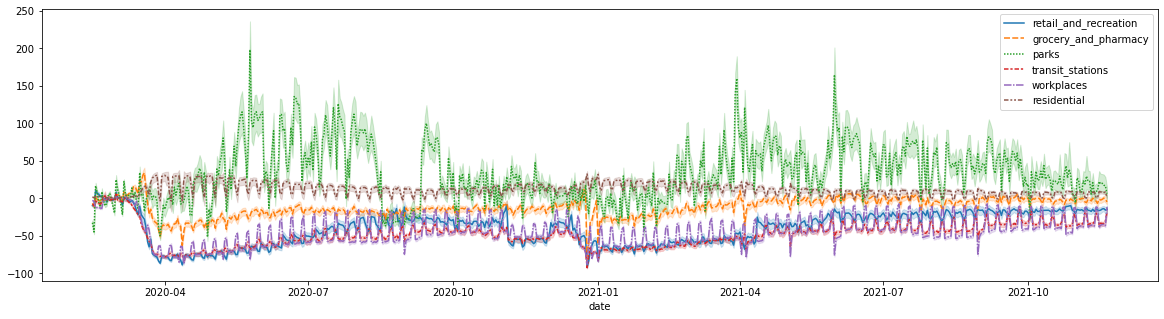

In [76]:
gmobility_interpolate = gmobility_interpolate.set_index(pd.DatetimeIndex(gmobility_interpolate['date']))
plt.figure(figsize=(20, 5))
sns.lineplot(data=gmobility_interpolate)

<AxesSubplot:xlabel='date'>

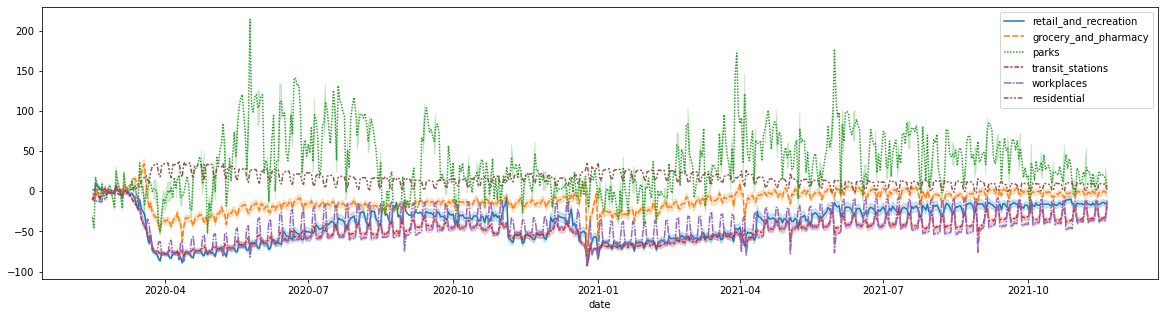

In [77]:
gmobility = gmobility.set_index(pd.DatetimeIndex(gmobility['date']))
plt.figure(figsize=(20, 5))
sns.lineplot(data=gmobility)

The Google Mobility Report estimates changes in how many people are staying at home and going to places of work compared to normal. It's difficult to translate this into exact percentages of the population, but changes back towards ‘normal' can be seen to start before any lockdown restrictions were lifted. This value gives a seven day rolling (mean) average to avoid it being distorted by weekends and bank holidays.

### Rolling average

In [78]:
gmobility_rolling = gmobility_interpolate.copy()
gmobility_rolling['retail_and_recreation'] = gmobility_rolling.iloc[:,2].rolling(window=7,min_periods=1).mean()
gmobility_rolling['grocery_and_pharmacy'] = gmobility_rolling.iloc[:,3].rolling(window=7,min_periods=1).mean()
gmobility_rolling['parks'] = gmobility_rolling.iloc[:,4].rolling(window=7,min_periods=1).mean()
gmobility_rolling['transit_stations'] = gmobility_rolling.iloc[:,5].rolling(window=7,min_periods=1).mean()
gmobility_rolling['workplaces'] = gmobility_rolling.iloc[:,6].rolling(window=7,min_periods=1).mean()
gmobility_rolling['residential'] = gmobility_rolling.iloc[:,7].rolling(window=7,min_periods=1).mean()
gmobility_rolling.to_csv('data/new_data/gmobility_rolling.csv', index=False)

In [79]:
gmobility_rolling = gmobility_rolling.set_index(pd.DatetimeIndex(gmobility_rolling['date']))
gmobility_rolling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21285 entries, 2020-02-15 to 2021-11-20
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Borough                21285 non-null  object        
 1   date                   21285 non-null  datetime64[ns]
 2   retail_and_recreation  21285 non-null  float64       
 3   grocery_and_pharmacy   21285 non-null  float64       
 4   parks                  21285 non-null  float64       
 5   transit_stations       21285 non-null  float64       
 6   workplaces             21285 non-null  float64       
 7   residential            21285 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.5+ MB


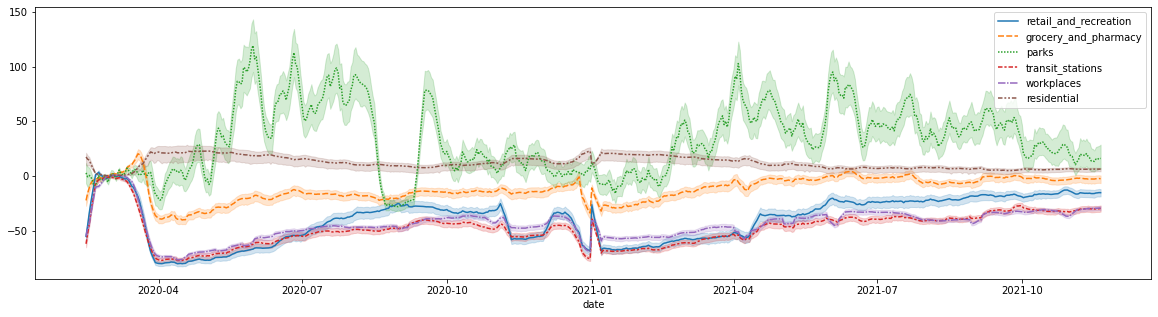

In [80]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=gmobility_rolling)
plt.show()

### Resample by Month

In [81]:
mobility_change = gmobility_rolling.copy()
mobility_change = mobility_change.groupby('Borough').resample('M').mean()
mobility_change = mobility_change.reset_index(drop=False)
mobility_change.head()

,Borough,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Barking and Dagenham,2020-02-29,-18.619048,-12.838095,-15.171429,-20.676190,-20.428571,6.733333
1,Barking and Dagenham,2020-03-31,-15.857143,5.645161,9.894009,-17.046083,-16.958525,7.105991
2,Barking and Dagenham,2020-04-30,-66.476190,-31.347619,31.209524,-60.933333,-63.928571,25.204762
3,Barking and Dagenham,2020-05-31,-61.110599,-17.225806,81.175115,-50.732719,-55.322581,21.004608
4,Barking and Dagenham,2020-06-30,-47.609524,-8.504762,100.976190,-41.042857,-41.428571,15.695238


In [86]:
list(mobility_change.iloc[:,2:].columns)

['retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']

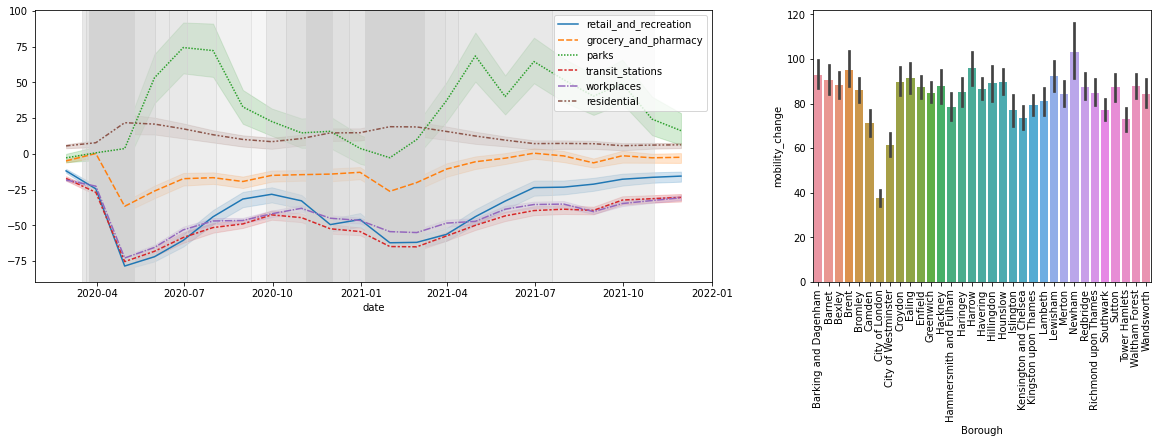

In [100]:
mobility_change = mobility_change.set_index(pd.DatetimeIndex(mobility_change['date']))
# plt.figure(figsize=(20, 5))
cols = list(mobility_change.iloc[:,2:].columns)

fig,(ax,ax1) = plt.subplots(ncols=2,figsize=(20,5),gridspec_kw={'width_ratios': [2, 1]})
ax1 = sns.barplot(x="Borough", y="mobility_change", data=mobility_change_melt)
ax = sns.lineplot(data=mobility_change, ax=ax)
for i, row in restrict.iterrows():
        ax.axvspan(xmin=row['start_date'], 
                   xmax=row['end_date'], 
                   edgecolor='lightgrey', 
                   facecolor='lightgrey', 
                   alpha=row['Color'])
ax1.xaxis.set_tick_params(rotation=90)

In [ ]:
for index, ctype in enumerate(df['Crime type'].unique()):
    fig,(ax,ax1) = plt.subplots(ncols=2,figsize=(20,5),gridspec_kw={'width_ratios': [2, 1]})
    sns.barplot(x="Borough", y="Count", data=df[df['Crime type']==ctype])
    ax2 = ax.twinx()
    sns.lineplot(data=mobility_change, ax=ax2)
    # ax2.invert_yaxis()
    sns.lineplot(data=df[df['Crime type']==ctype],x='Month',y='Count',color='b',ax=ax)
    ax.set_title('{}'.format(ctype), fontsize=12)
    ax.set_xlabel('Date (Month)')
    ax.grid()
    xtick = df.Month
    ax.set_xticks(xtick, minor=True)
    ax1.xaxis.set_tick_params(rotation=90)
    ax1.set_title('{} distribution by Borough'.format(ctype), fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    for i, row in restrict.iterrows():
        ax.axvspan(xmin=row['start_date'], 
               xmax=row['end_date'], 
               edgecolor='white', 
               facecolor='lightgray', 
               alpha=row['Color'],
               zorder=0)

plt.show()

In [98]:
mobility_change_melt = mobility_change.melt(id_vars=['date','Borough'], 
              value_vars=['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential'],
              var_name='activity', value_name='change')
mobility_change_melt.head()

,date,Borough,activity,change
0,2020-02-29,Barking and Dagenham,retail_and_recreation,-18.619048
1,2020-03-31,Barking and Dagenham,retail_and_recreation,-15.857143
2,2020-04-30,Barking and Dagenham,retail_and_recreation,-66.476190
3,2020-05-31,Barking and Dagenham,retail_and_recreation,-61.110599
4,2020-06-30,Barking and Dagenham,retail_and_recreation,-47.609524


In [99]:
mobility_change_melt['mobility_change'] = 100 + mobility_change_melt['change']
mobility_change_melt.head()

,date,Borough,activity,change,mobility_change
0,2020-02-29,Barking and Dagenham,retail_and_recreation,-18.619048,81.380952
1,2020-03-31,Barking and Dagenham,retail_and_recreation,-15.857143,84.142857
2,2020-04-30,Barking and Dagenham,retail_and_recreation,-66.476190,33.523810
3,2020-05-31,Barking and Dagenham,retail_and_recreation,-61.110599,38.889401
4,2020-06-30,Barking and Dagenham,retail_and_recreation,-47.609524,52.390476


In [35]:
mobility_change_melt['date'] = pd.to_datetime(mobility_change_melt['date'], format="%Y-%m-%d")
mobility_change_melt['date'] = mobility_change_melt['date'] + pd.DateOffset(days=3)

In [36]:
mobility_change_melt.head()

,date,Borough,activity,change,mobility_change
0,2020-03-03,Barking and Dagenham,retail_and_recreation,-18.619048,81.380952
1,2020-04-03,Barking and Dagenham,retail_and_recreation,-15.857143,84.142857
2,2020-05-03,Barking and Dagenham,retail_and_recreation,-66.476190,33.523810
3,2020-06-03,Barking and Dagenham,retail_and_recreation,-61.110599,38.889401
4,2020-07-03,Barking and Dagenham,retail_and_recreation,-47.609524,52.390476


## Crime data

In [37]:
crimes_by_borough = pd.read_csv('data/new_data/crimes_by_borough.csv')
crimes_by_borough['Month'] = pd.to_datetime(crimes_by_borough['Month'], format="%Y-%m-%d")#.dt.strftime('%Y-%m')
crimes_by_borough.head()

,Borough,Crime type,Month,Number of Crimes
0,Barking and Dagenham,Anti-social behaviour,2019-01-01,358.0
1,Barking and Dagenham,Burglary,2019-01-01,161.0
2,Barking and Dagenham,Criminal damage and arson,2019-01-01,100.0
3,Barking and Dagenham,Drugs,2019-01-01,75.0
4,Barking and Dagenham,Other crime,2019-01-01,15.0


In [38]:
mobility_change_melt['date'] = pd.to_datetime(mobility_change_melt['date'], format="%Y-%m-%d").dt.strftime('%Y-%m')
crimes_by_borough['Month'] = pd.to_datetime(crimes_by_borough['Month'], format="%Y-%m-%d").dt.strftime('%Y-%m')

In [39]:
mobility_change_melt = mobility_change_melt[mobility_change_melt.date != '2021-12']

In [40]:
mobility_change_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4354
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4158 non-null   object 
 1   Borough          4158 non-null   object 
 2   activity         4158 non-null   object 
 3   change           4158 non-null   float64
 4   mobility_change  4158 non-null   float64
dtypes: float64(2), object(3)
memory usage: 194.9+ KB


In [41]:
mobility_change.head()

,Borough,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,,,
2020-02-29,Barking and Dagenham,2020-02-29,-18.619048,-12.838095,-15.171429,-20.676190,-20.428571,6.733333
2020-03-31,Barking and Dagenham,2020-03-31,-15.857143,5.645161,9.894009,-17.046083,-16.958525,7.105991
2020-04-30,Barking and Dagenham,2020-04-30,-66.476190,-31.347619,31.209524,-60.933333,-63.928571,25.204762
2020-05-31,Barking and Dagenham,2020-05-31,-61.110599,-17.225806,81.175115,-50.732719,-55.322581,21.004608
2020-06-30,Barking and Dagenham,2020-06-30,-47.609524,-8.504762,100.976190,-41.042857,-41.428571,15.695238


In [42]:
mcorr = mobility_change.reset_index(drop=True)
mcorr['date'] = pd.to_datetime(mcorr['date'], format="%Y-%m-%d")
mcorr['date'] = mcorr['date'] + pd.DateOffset(days=3)
mcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Borough                726 non-null    object        
 1   date                   726 non-null    datetime64[ns]
 2   retail_and_recreation  726 non-null    float64       
 3   grocery_and_pharmacy   726 non-null    float64       
 4   parks                  726 non-null    float64       
 5   transit_stations       726 non-null    float64       
 6   workplaces             726 non-null    float64       
 7   residential            726 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 45.5+ KB


In [43]:
mcorr['date'] = pd.to_datetime(mcorr['date'], format="%Y-%m-%d").dt.strftime('%Y-%m') 
mcorr = mcorr[mcorr.date != '2021-12']
mcorr['date'].unique()

array(['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11'], dtype=object)

In [44]:
ccorr = pd.read_csv('data/new_data/crime_gp_boroughmonth.csv')
ccorr['Month'] = pd.to_datetime(ccorr['Month'], format="%Y-%m-%d").dt.strftime('%Y-%m') 
ccorr = ccorr[ccorr['Month']>'2020-02']

In [45]:
ccorr.head()

,Borough,Month,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Total
14,Barking and Dagenham,2020-03,466.0,7.0,125.0,112.0,96.0,13.0,147.0,12.0,95.0,80.0,104.0,54.0,218.0,622.0,2151.0
15,Barking and Dagenham,2020-04,1413.0,8.0,81.0,84.0,140.0,27.0,98.0,11.0,68.0,28.0,44.0,18.0,145.0,427.0,2592.0
16,Barking and Dagenham,2020-05,1118.0,14.0,57.0,92.0,183.0,22.0,111.0,14.0,85.0,43.0,50.0,33.0,161.0,512.0,2495.0
17,Barking and Dagenham,2020-06,718.0,29.0,80.0,123.0,181.0,38.0,104.0,19.0,98.0,50.0,54.0,27.0,176.0,547.0,2244.0
18,Barking and Dagenham,2020-07,661.0,22.0,100.0,124.0,120.0,26.0,144.0,14.0,93.0,58.0,67.0,32.0,148.0,600.0,2209.0


In [46]:
ccorr.Month.unique()

array(['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11'], dtype=object)

In [47]:
mccorr = pd.merge(mcorr, ccorr,  how='left', left_on=['Borough','date'], right_on = ['Borough','Month'])

In [48]:
mccorr.drop(['date', 'Month'],axis=1, inplace=True)

In [49]:
mccorr.head()

,Borough,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Total
0,Barking and Dagenham,-18.619048,-12.838095,-15.171429,-20.676190,-20.428571,6.733333,466.0,7.0,125.0,112.0,96.0,13.0,147.0,12.0,95.0,80.0,104.0,54.0,218.0,622.0,2151.0
1,Barking and Dagenham,-15.857143,5.645161,9.894009,-17.046083,-16.958525,7.105991,1413.0,8.0,81.0,84.0,140.0,27.0,98.0,11.0,68.0,28.0,44.0,18.0,145.0,427.0,2592.0
2,Barking and Dagenham,-66.476190,-31.347619,31.209524,-60.933333,-63.928571,25.204762,1118.0,14.0,57.0,92.0,183.0,22.0,111.0,14.0,85.0,43.0,50.0,33.0,161.0,512.0,2495.0
3,Barking and Dagenham,-61.110599,-17.225806,81.175115,-50.732719,-55.322581,21.004608,718.0,29.0,80.0,123.0,181.0,38.0,104.0,19.0,98.0,50.0,54.0,27.0,176.0,547.0,2244.0
4,Barking and Dagenham,-47.609524,-8.504762,100.976190,-41.042857,-41.428571,15.695238,661.0,22.0,100.0,124.0,120.0,26.0,144.0,14.0,93.0,58.0,67.0,32.0,148.0,600.0,2209.0


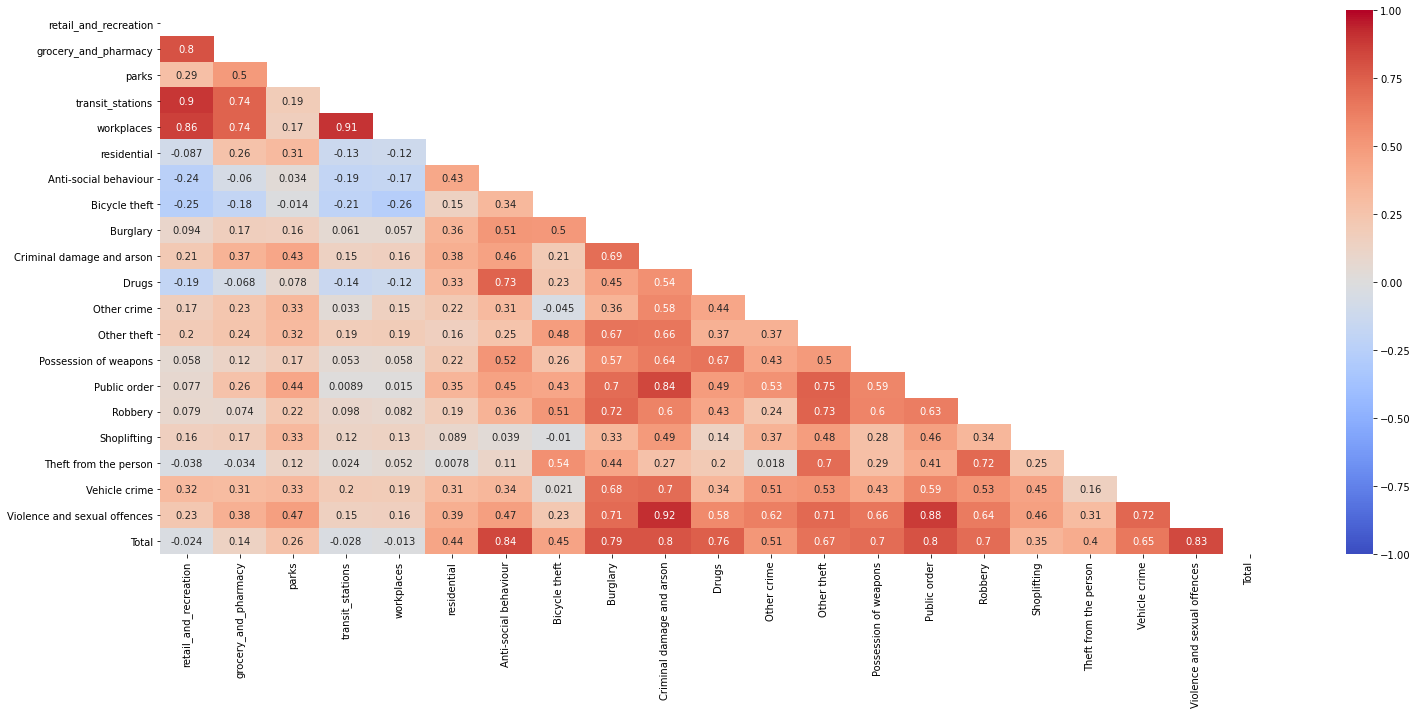

In [50]:
# Generate heat map 
plt.figure(figsize=(25, 10))
mask = np.zeros_like(mccorr.corr(method='spearman'), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(mccorr.corr(method='pearson'), annot = True, \
            mask=mask, cmap = 'coolwarm', 
            vmin=-1.0, vmax=1.0)
plt.show()
